# Aim of our Project
This project aims to provide insights into the factors influencing employee attrition and predict which employees are       
likely to leave the company.


# Problem Statement:
Acme Corporation, a leading tech company, is facing a significant challenge with employee turnover. The HR department is concerned about the increasing rate of attrition, as it negatively impacts team dynamics, project continuity, and overall company morale. To address this issue, Acme Corporation wants to leverage data analytics and machine learning to understand the factors influencing employee turnover and predict which employees are likely to leave in the near future.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# loading and reading the dataset
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# lets see information about each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

* here we can see that object type features are present, which are need to be labeld and convert to numerical data, which we wil deal with later section
* we have 1470 records and 35 featues
* There are 26(Numerical) and 9(categorical) features.
* Attrition is the *Binary Target* variable

In [5]:
# statistics of tha data
round(df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.92,9.14,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.49,403.51,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.19,8.11,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.91,1.02,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.00,0.00,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.87,602.02,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.72,1.09,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.89,20.33,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.73,0.71,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.06,1.11,1.0,1.00,2.0,3.00,5.0


* The Minimum Age is 18 which conveys that All employees are Adult. So there's no need of Over18 Attribute for our analysis.
* The Stanard Deviation value of EmployeeCount and StandardHours is 0.00. Which conveys that all values present in this attribute are same.
* Attribute EmployeeNumber represents a unique value to each of the employees, which will not provide any meaningful inisghts.
* Since this Attribute will not provide any meaningful insights in our analysis, we can simply drop these attributes.

In [6]:
cols = ["Over18", "EmployeeCount", "EmployeeNumber", "StandardHours"]
df.drop(columns=cols, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

now we are left with 23 numerical and 8 categorical features

# Data cleaning or preprocessing

In [8]:
#Lets check for duplicate
df.duplicated().sum()

0

In [9]:
# Check for null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

it is found that there are no currupt values or incorrect data types/formats

# Exploratory Data Analysis¶

In [10]:
def column_summary(df):
    summary_data = []

    for col_name in df.columns:
        col_dtype = df[col_name].dtype
        num_of_nulls = df[col_name].isnull().sum()
        num_of_non_nulls = df[col_name].notnull().sum()
        num_of_distinct_values = df[col_name].nunique()

        if num_of_distinct_values <= 10:
            distinct_values_counts = df[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = df[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })

    summary_df = pd.DataFrame(summary_data)
    return summary_df

# Example usage:
# Assuming df is your DataFrame
summary_df = column_summary(df)
display(summary_df)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,Age,int64,0,1470,43,"{35: 78, 34: 77, 36: 69, 31: 69, 29: 68, 32: 6..."
1,Attrition,object,0,1470,2,"{'No': 1233, 'Yes': 237}"
2,BusinessTravel,object,0,1470,3,"{'Travel_Rarely': 1043, 'Travel_Frequently': 2..."
3,DailyRate,int64,0,1470,886,"{691: 6, 408: 5, 530: 5, 1329: 5, 1082: 5, 329..."
4,Department,object,0,1470,3,"{'Research & Development': 961, 'Sales': 446, ..."
5,DistanceFromHome,int64,0,1470,29,"{2: 211, 1: 208, 10: 86, 9: 85, 3: 84, 7: 84, ..."
6,Education,int64,0,1470,5,"{3: 572, 4: 398, 2: 282, 1: 170, 5: 48}"
7,EducationField,object,0,1470,6,"{'Life Sciences': 606, 'Medical': 464, 'Market..."
8,EnvironmentSatisfaction,int64,0,1470,4,"{3: 453, 4: 446, 2: 287, 1: 284}"
9,Gender,object,0,1470,2,"{'Male': 882, 'Female': 588}"


# Analysis of univariate variables
A univariate variable is a statistical term used to refer to a set of observations of an attribute. That is, the column-by-column analysis of the DataFrame. To do this, we must distinguish whether a variable is categorical or numerical, as the body of the analysis and the conclusions that can be drawn will be different.

In [11]:
numerical_columns=df.select_dtypes(include=np.number)
num_col = [] # only to store data with more that 10 unique values
for i in numerical_columns:
    if len(df[i].value_counts())>10:
        num_col.append(i)

In [12]:
cat_columns = df.select_dtypes(exclude=np.number)

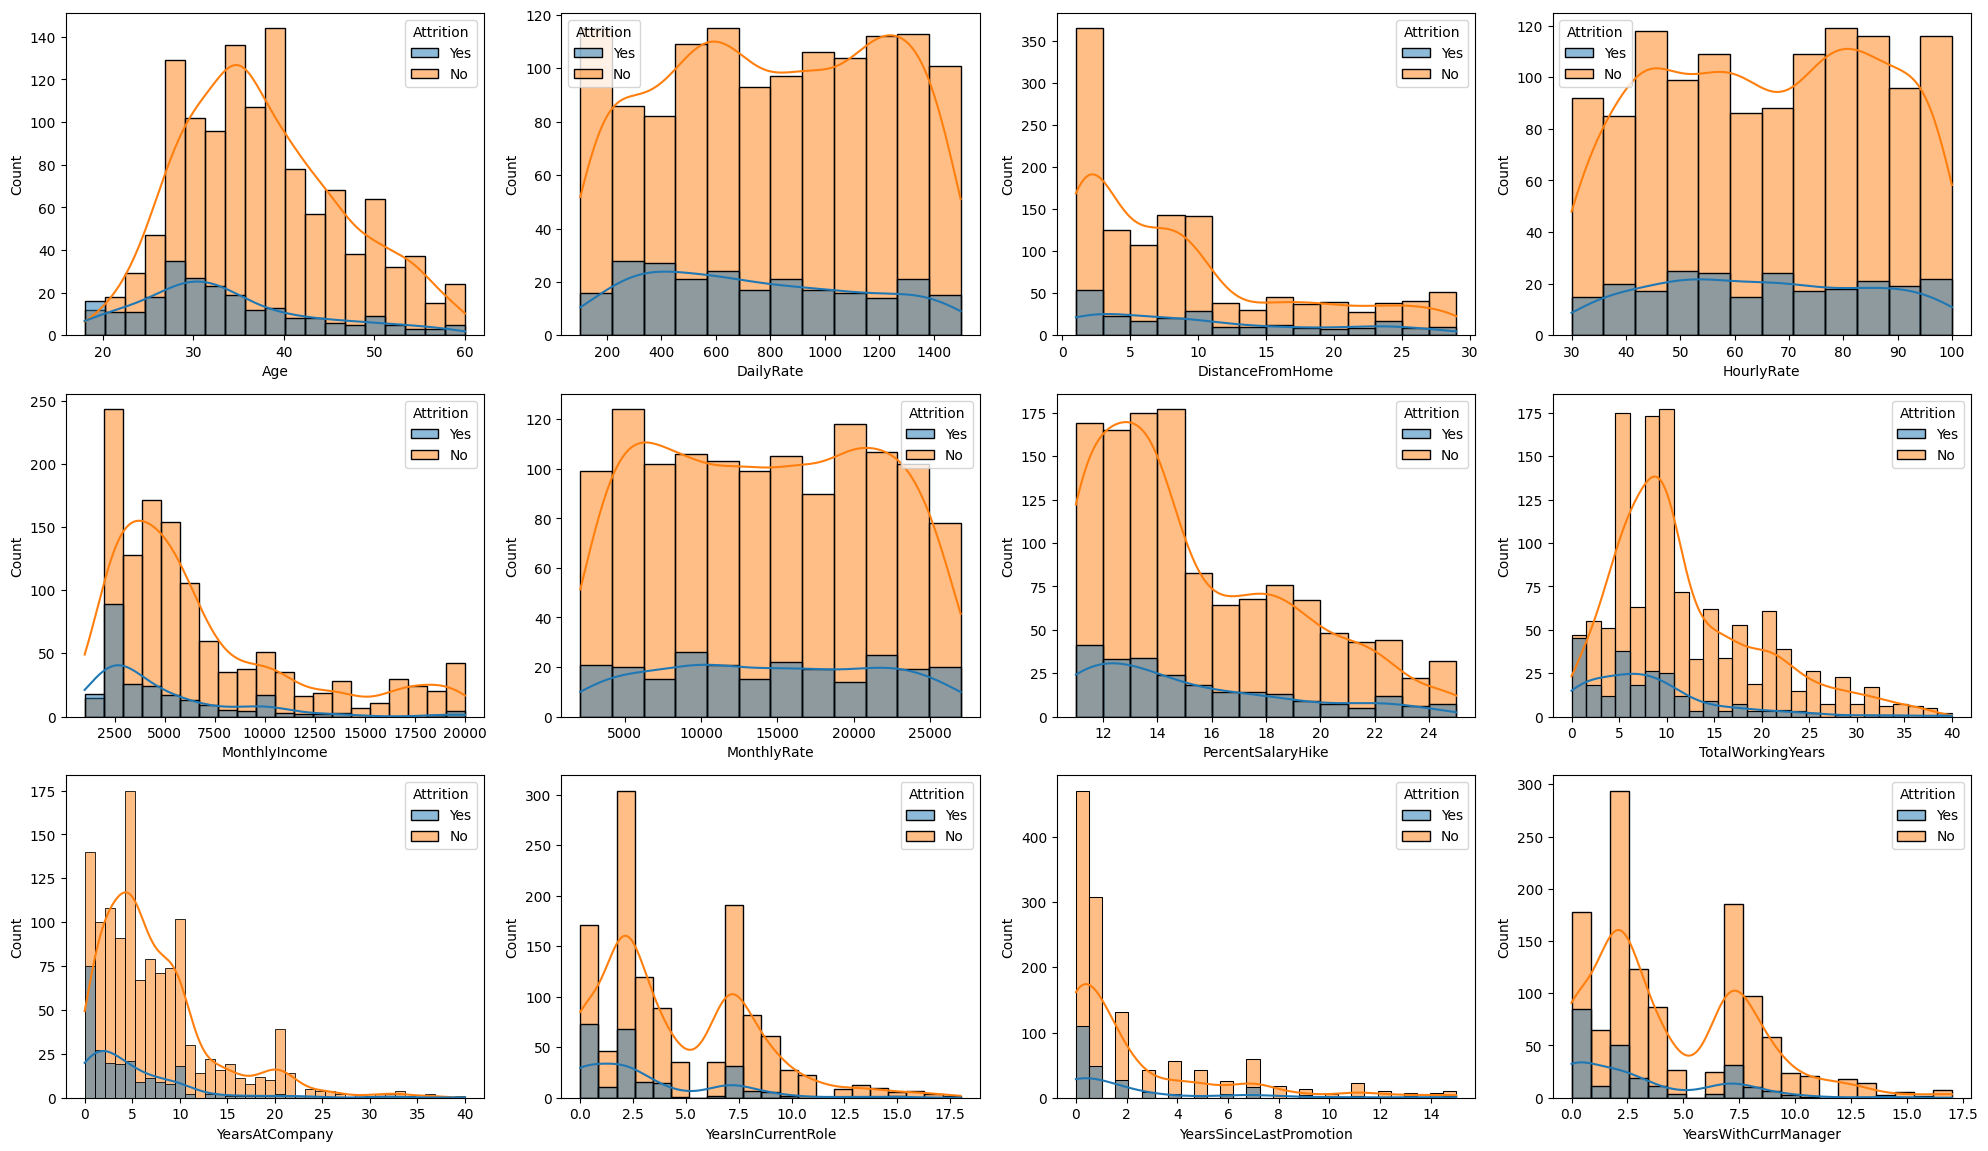

In [13]:
#univariate analysis of numerical data
plt.figure(figsize=(20, 15))
for i, col in enumerate(num_col, 1):
        plt.subplot(4,4, i)
        sns.histplot(data=df,x=df[col], kde=True,hue=df['Attrition'])
plt.tight_layout()
plt.show()

from above plots we can interpret that:
* Most working people are between 30 to 40 age group
* only less than 50 people earns more than 20000
* only less than 50 people got hike mor than 20%
* average working year of employees between 0 to 5 years
* Most data are right skewed
* Employee who have worked for 10+ years are having low attrition rate.
* Highest Attrition is in the first year of employee joining organisation.

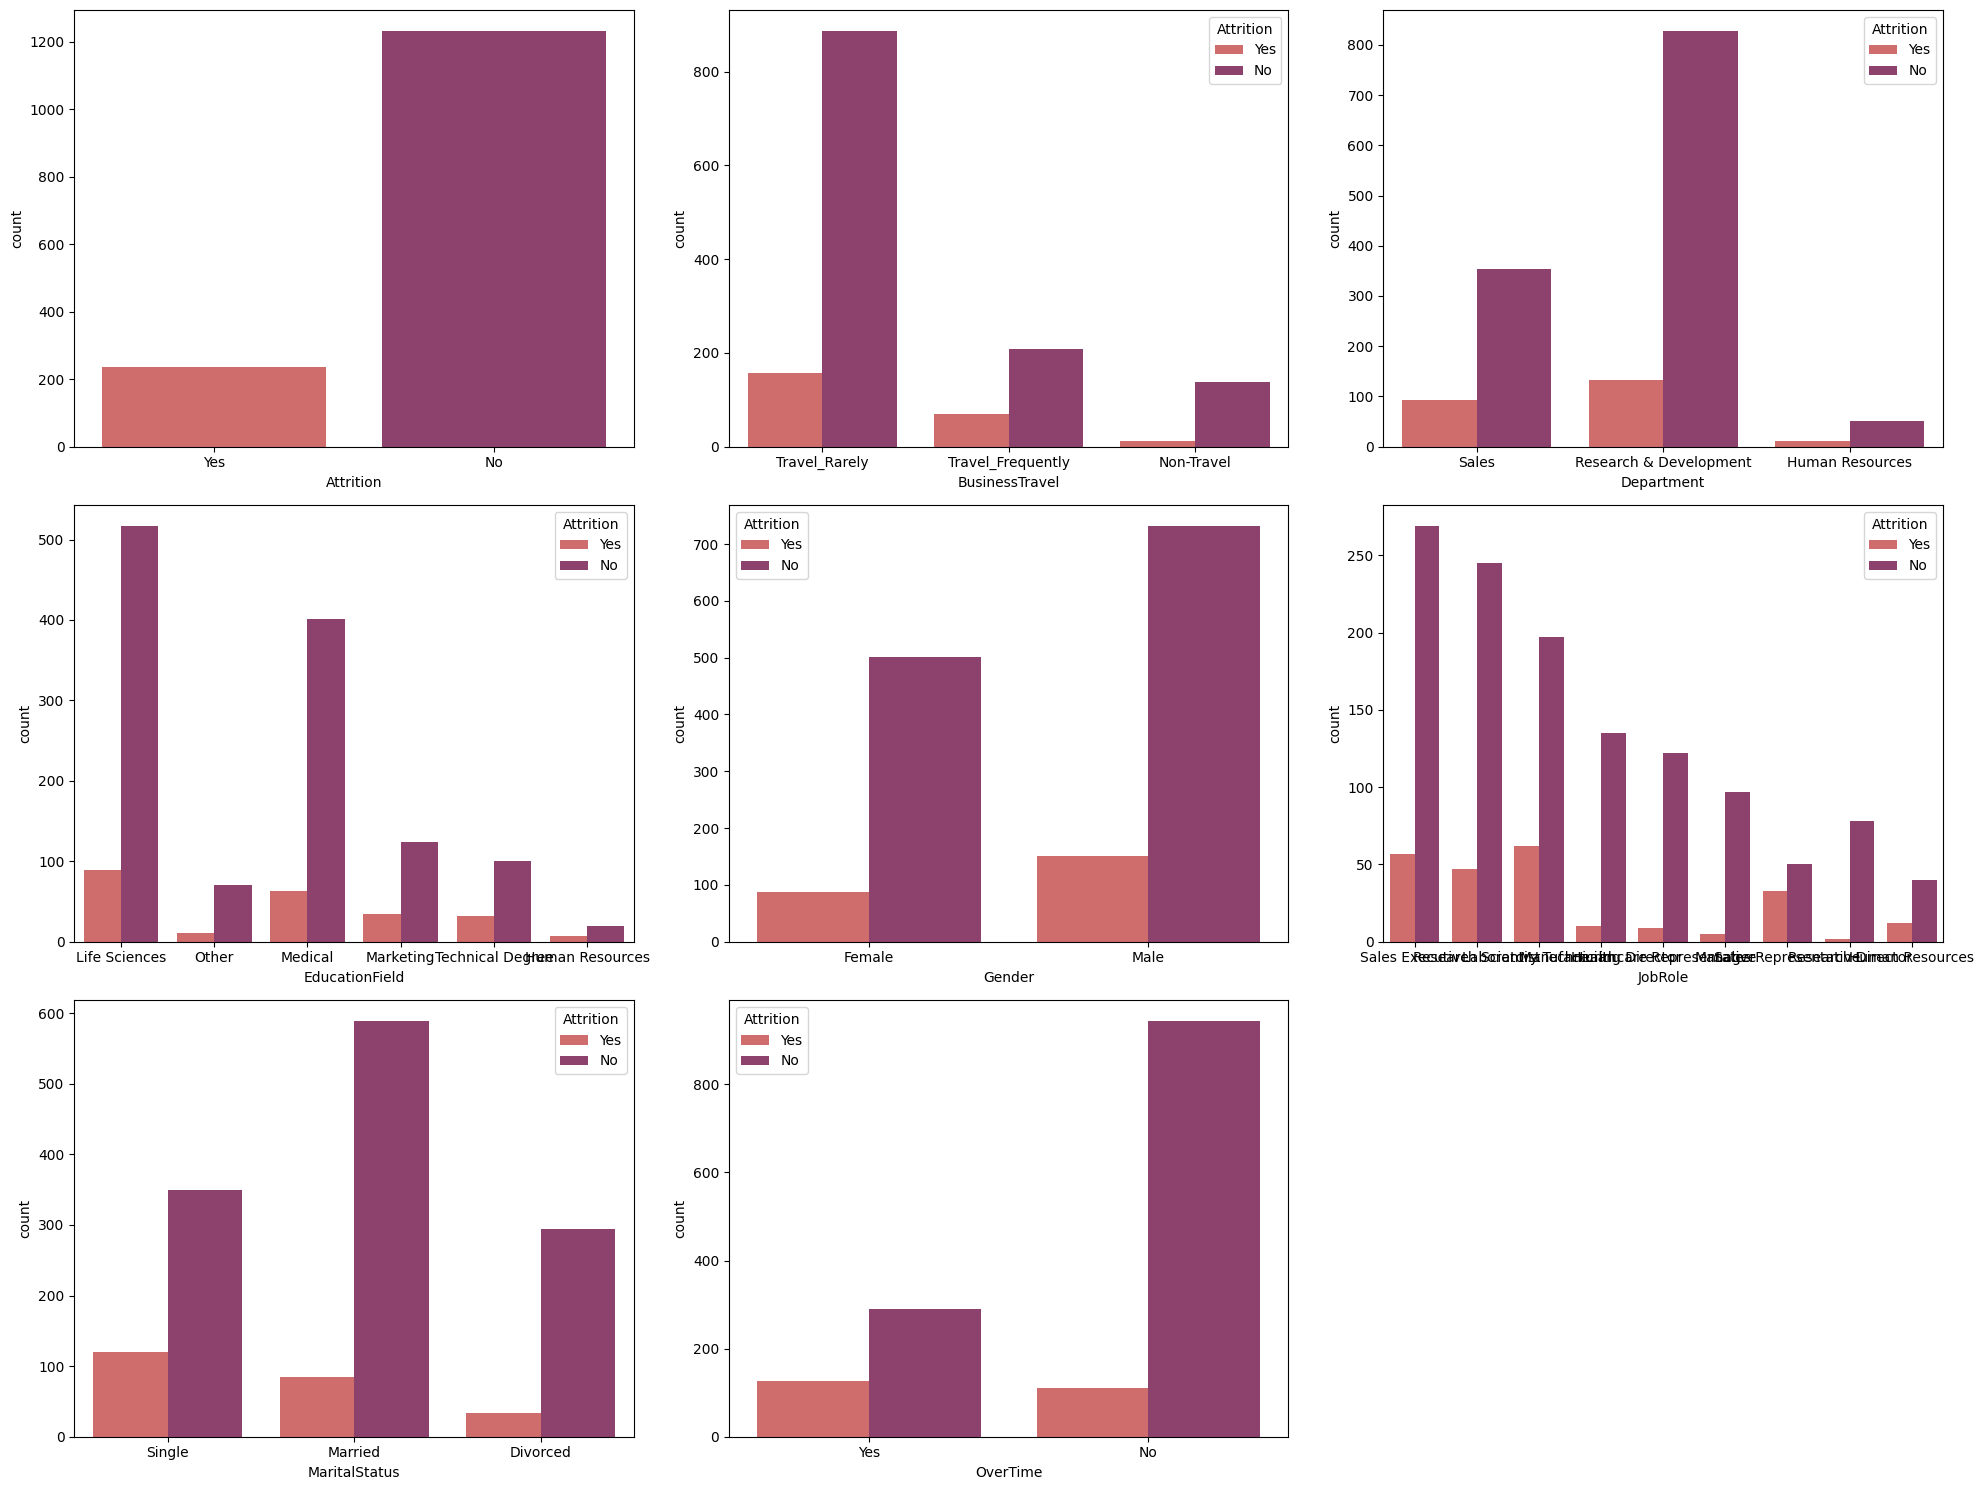

In [14]:
#univariate analysis of categorical data
plt.figure(figsize=(20, 15))
for i, col in enumerate(cat_columns, 1):
        plt.subplot(3,3, i)
        sns.countplot(data=df,x=col,hue='Attrition',palette = 'flare')
        plt.xlabel(col)
plt.tight_layout()
plt.savefig('univariate_numerical.png')
plt.show()

from above plot we can say that:
* The target variable exhibits class imbalance.
* Individuals who travel infrequently tend to have a higher attrition rate.
* Male employees are more likely to experience attrition compared to females.
* Employees who work overtime are prone to attrition.
* Highest Attrition is in the Sales and Research & Development Department.

In [15]:
# finction to create count plot
def count_percent_plot(df, col, hue):

    plt.figure(figsize=(13.5, 8))
    plt.subplot(1, 2, 1)
    value_1 = df[col].value_counts()
    sns.barplot(x=value_1.index, y=value_1.values, order=value_1.index, palette='Set2')
    plt.title(f"Employees by {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(value_1.values):
        count_percentage = "{:.1f}%".format((value / len(df)) * 100)
        plt.text(index, value, f"{value} ({count_percentage})", ha="center", va="bottom", size=10)
    plt.xticks(rotation=90)

    # Sort the values for the second subplot to match the order of the first subplot
    value_2 = df[df[hue] == 'Yes'][col].value_counts().reindex(value_1.index)

    plt.subplot(1, 2, 2)
    attrition_rate = (value_2 / value_1 * 100).values
    sns.barplot(x=value_2.index, y=value_2.values, order=value_1.index, palette='Set2')
    plt.title(f"Employee Attrition by {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(value_2.values):
        attrition_percentage = "{:.1f}%".format(np.round(attrition_rate[index], 1))
        plt.text(index, value, f"{value} ({attrition_percentage})", ha="center", va="bottom", size=10)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

<ipython-input-15-0ce0e20f1ffc>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_1.index, y=value_1.values, order=value_1.index, palette='Set2')
<ipython-input-15-0ce0e20f1ffc>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_2.index, y=value_2.values, order=value_1.index, palette='Set2')


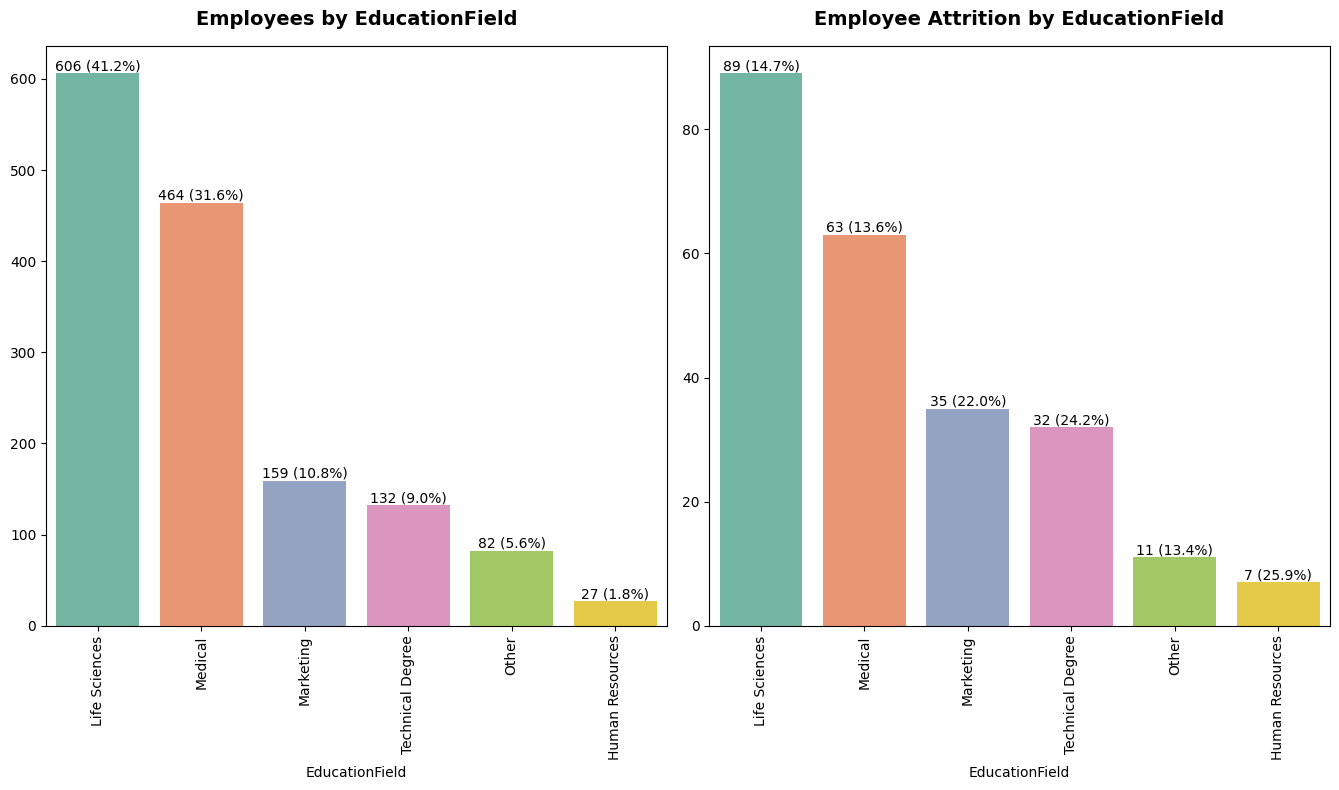

In [16]:
count_percent_plot(df, 'EducationField', 'Attrition')

* Most of the employees are either from Life Science or Medical Education Field.
* Very few employees are from Human Resources Education Field.
* Education Fields like Human Resources, Technical, Marketing is having very high attrition rate.
* This may be because of work load becuase there are very few employees in these education fields compared to education field with less attrition rate.

In [17]:
# finction to create pie and bar plot side by side
def pie_bar_plot(df, col, hue):
    plt.figure(figsize=(14, 6))

    # Extract value counts for the specified column
    value_counts = df[col].value_counts().sort_index()

    # First subplot: Pie chart
    plt.subplot(1, 2, 1)
    ax1 = value_counts
    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=15)
    colors = sns.color_palette('Set2', len(ax1))
    plt.pie(ax1.values, labels=ax1.index, autopct="%.1f%%", pctdistance=0.75, startangle=90,
            colors=colors, textprops={"size":14})
    center_circle = plt.Circle((0, 0), 0.4, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)

    # Second subplot: Bar plot
    plt.subplot(1, 2, 2)
    new_df = df[df[hue] == 'Yes']
    value_1 = value_counts
    value_2 = new_df[col].value_counts().sort_index()  # Sort the values in the same order
    ax2 = np.floor((value_2 / value_1) * 100).values
    sns.barplot(x=value_2.index, y=value_2.values, palette='Set2')
    plt.title(f"Attrition Rate by {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(value_2):
        plt.text(index, value, str(value) + " (" + str(int(ax2[index])) + "% )", ha="center", va="bottom", size=10)

    plt.tight_layout()
    plt.show()

<ipython-input-17-b978a43dfd59>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_2.index, y=value_2.values, palette='Set2')


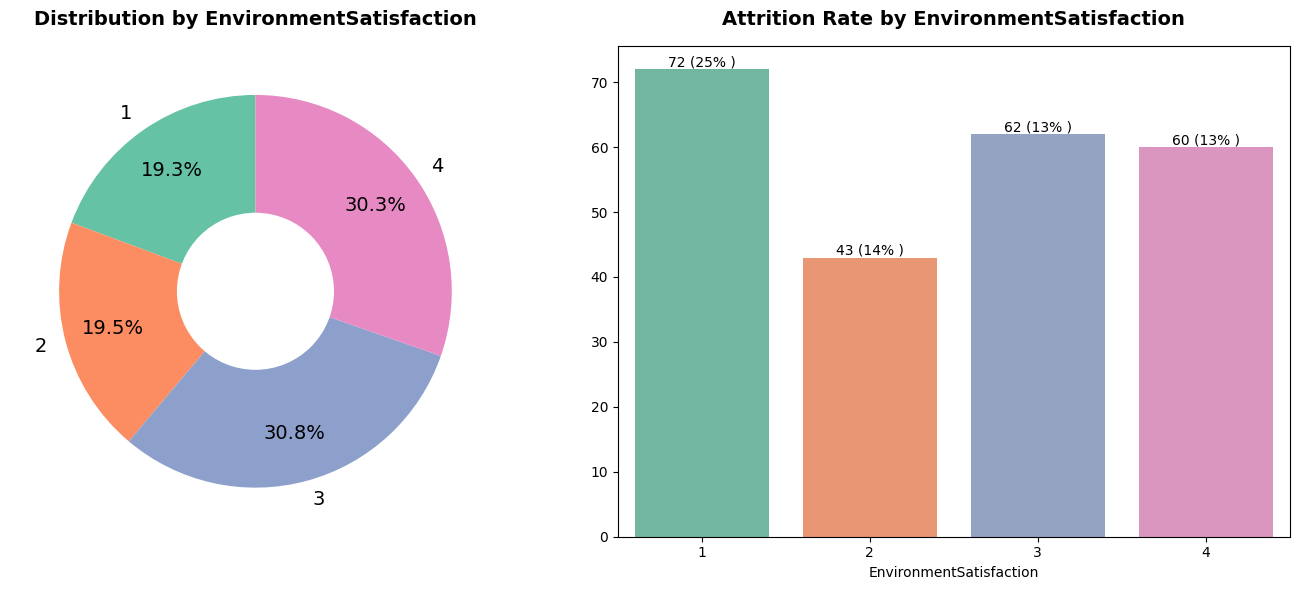

In [18]:
pie_bar_plot(df, 'EnvironmentSatisfaction', 'Attrition')

* Most of the employees have rated the organization environment satisfaction 3 & 4.
* Attrition Rate is high among the employee with 4 level of environment satisfication.

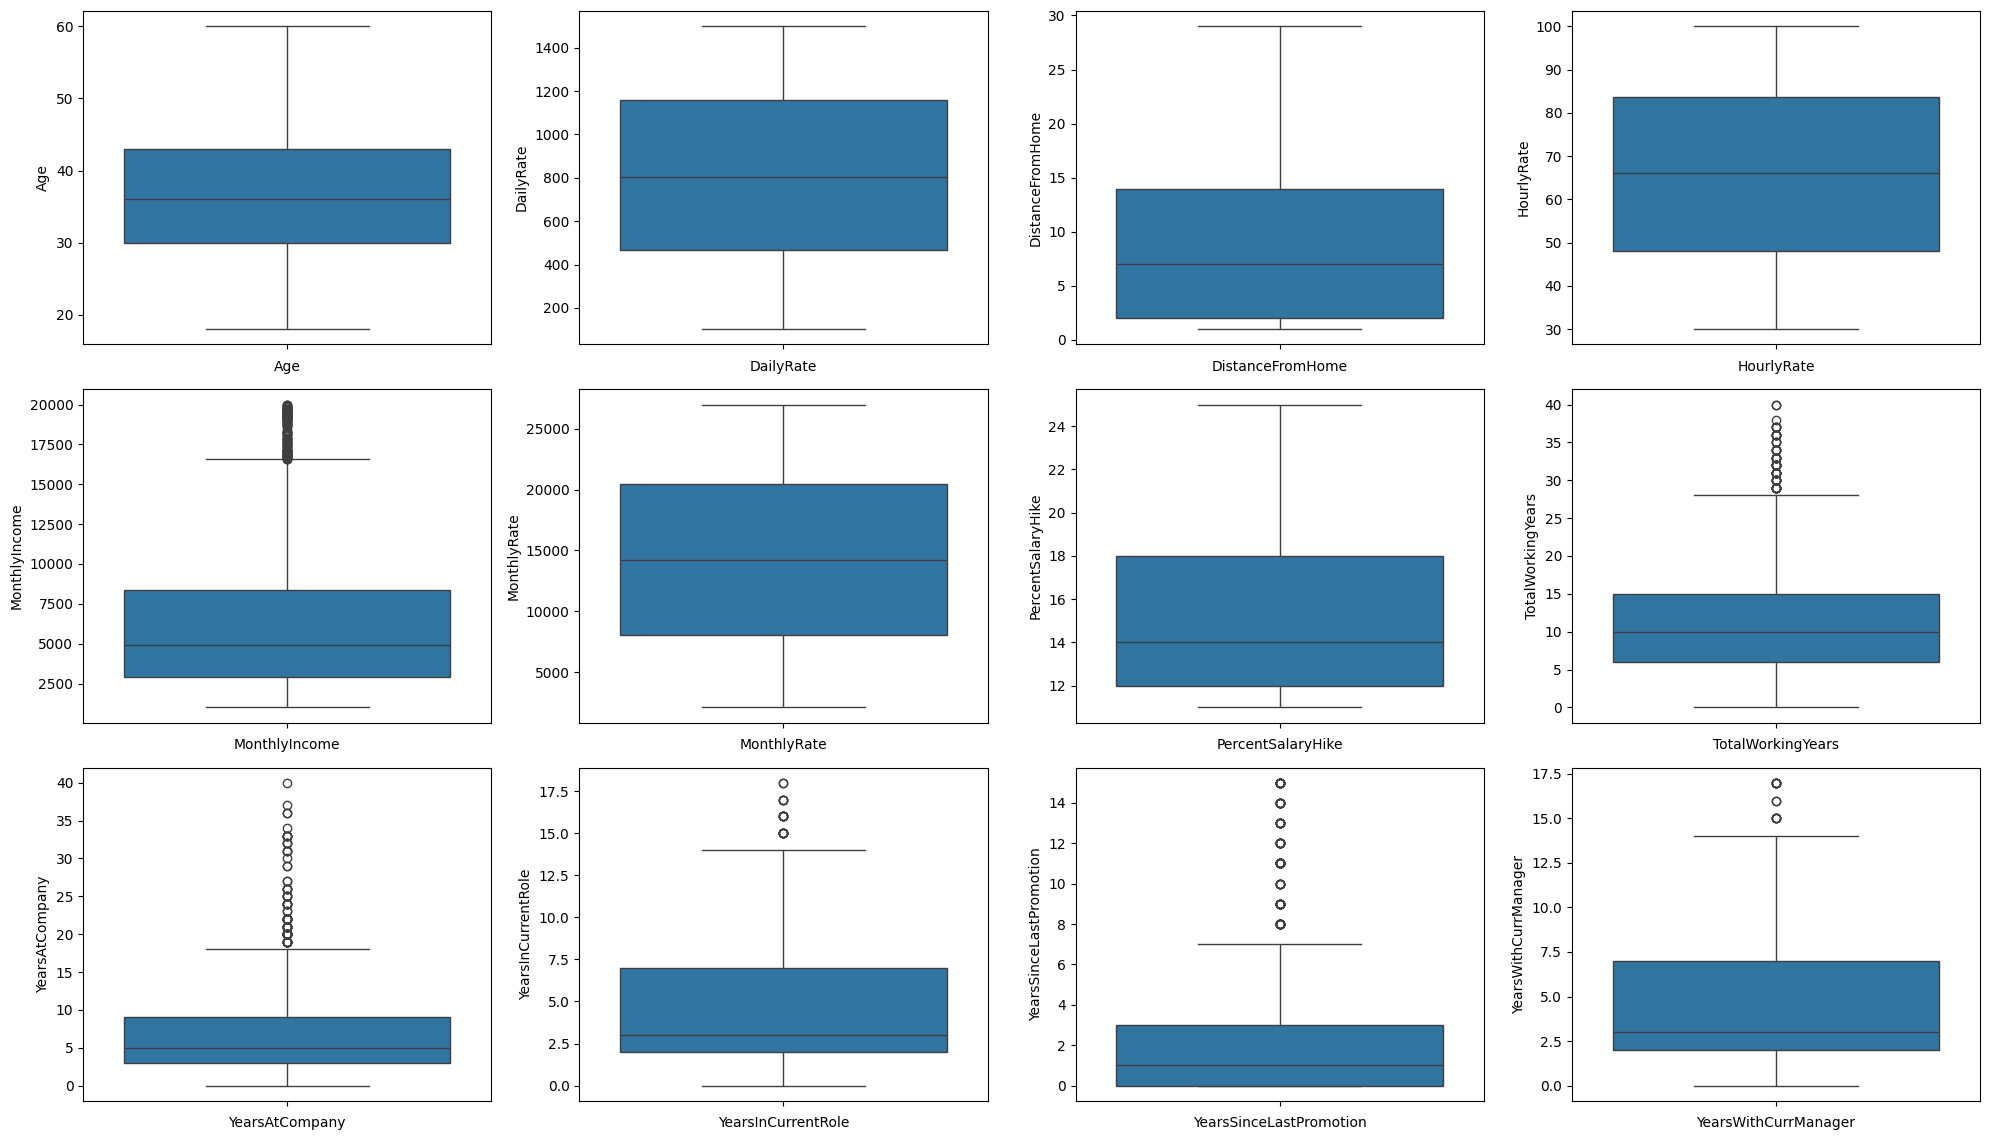

In [19]:
#Check for outliers
plt.figure(figsize=(20, 15))
for i, col in enumerate(num_col, 1):
        plt.subplot(4,4, i)
        sns.boxplot(df[col])
        plt.xlabel(col)
plt.tight_layout()
plt.savefig('univariate_numerical.png')
plt.show()

# Data Processing/Transformation

In [20]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


### Encoding Categorical columns
####  encoding binary class features using label encoding

In [21]:
# Attrition, Gender and OverTime columns which are binary class types
df['Attrition'] = df['Attrition'].map({'Yes':1,'No':0})
df['OverTime'] = df['OverTime'].map({'Yes':1,'No':0})
df['Gender'] = df['Gender'].map({'Female':1,'Male':0})

In [22]:
cat_columns.drop(columns=['Gender','Attrition','OverTime'],inplace=True)

#### encoding multiclass features using one hot encoding

In [23]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

In [24]:
# the following code creates sparse matrix , which we need to create back as df
encoded = encoder.fit_transform(df[['BusinessTravel',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',]])

In [25]:
encoded_df = pd.DataFrame(encoded.toarray(),columns = encoder.get_feature_names_out())

In [26]:
final_df = pd.concat([df,encoded_df],axis=1)

In [27]:
final_df = final_df.drop(['BusinessTravel',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',],axis =1)

In [28]:
# lets save the final data in csv file
final_df.to_csv('cleaned_data','w')
from google.colab import files
files.download('cleaned_data')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   int64  
 1   Attrition                          1470 non-null   int64  
 2   DailyRate                          1470 non-null   int64  
 3   DistanceFromHome                   1470 non-null   int64  
 4   Education                          1470 non-null   int64  
 5   EnvironmentSatisfaction            1470 non-null   int64  
 6   Gender                             1470 non-null   int64  
 7   HourlyRate                         1470 non-null   int64  
 8   JobInvolvement                     1470 non-null   int64  
 9   JobLevel                           1470 non-null   int64  
 10  JobSatisfaction                    1470 non-null   int64  
 11  MonthlyIncome                      1470 non-null   int64

* no null values present in the final data

<Axes: title={'center': 'Correlation Plot'}>

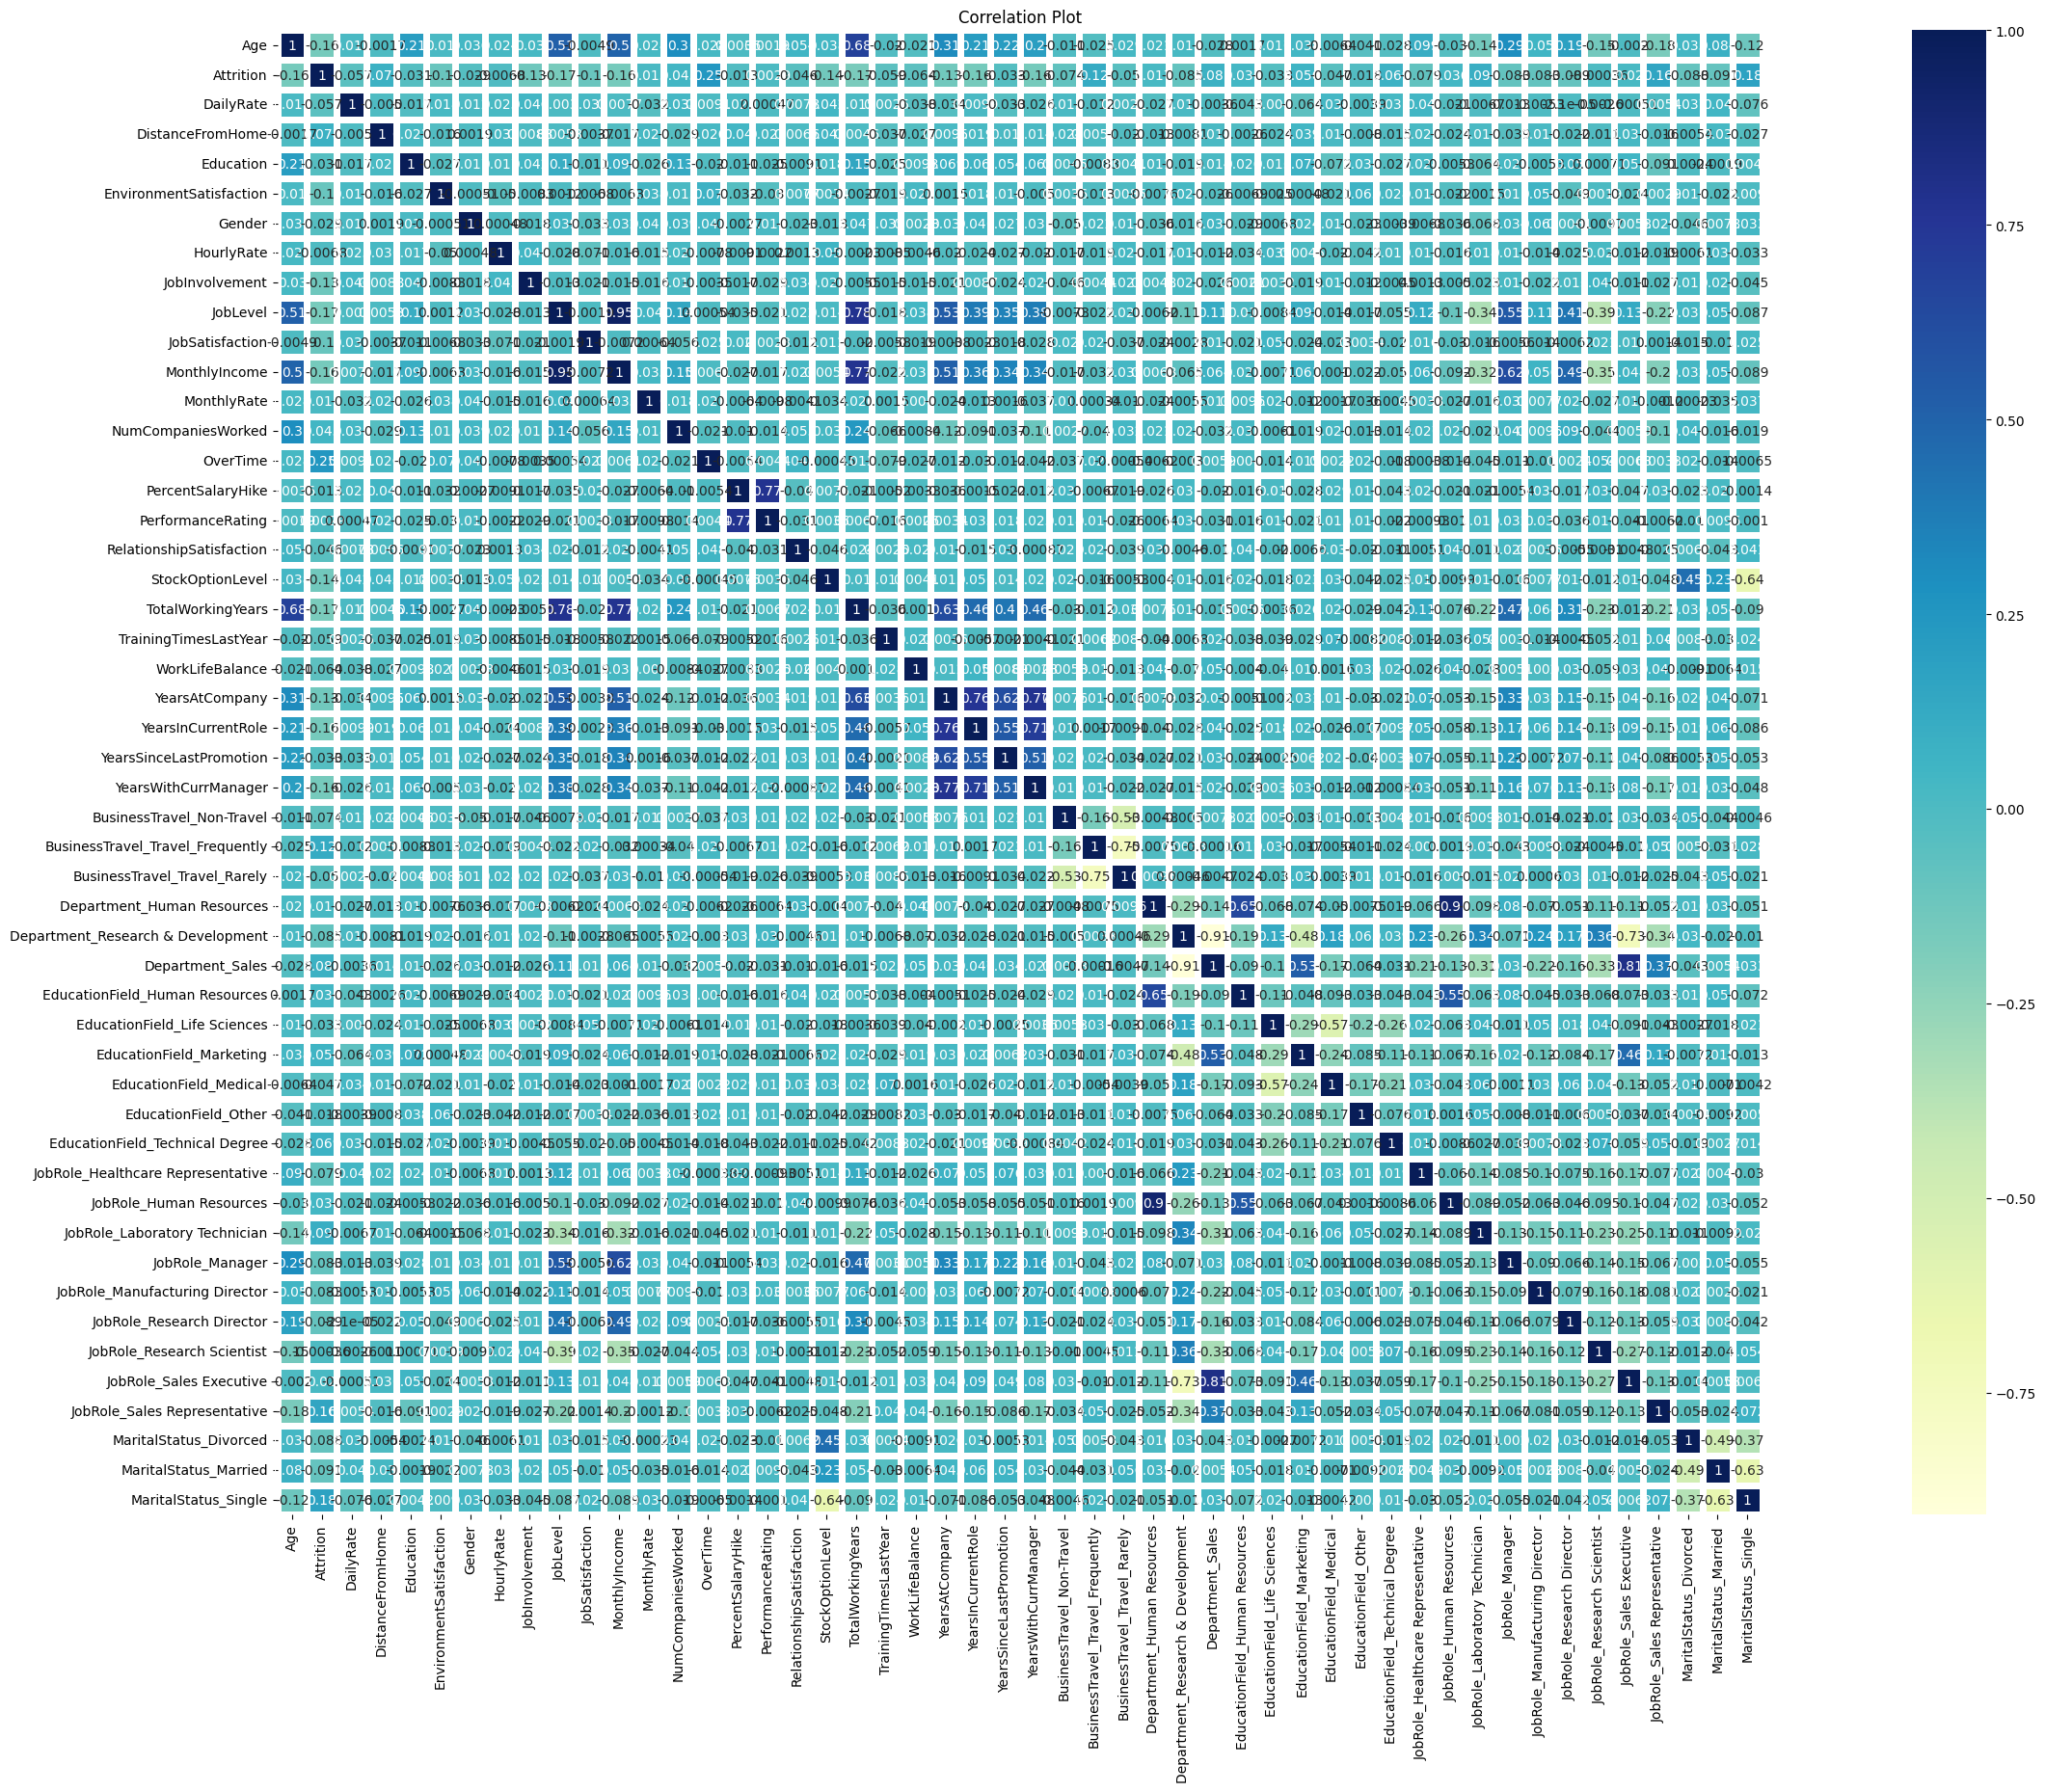

In [30]:
plt.figure(figsize=(40,20))
plt.title("Correlation Plot")
sns.heatmap(final_df.corr(),linewidths=5, annot=True, square=True,annot_kws={'size': 10},cmap='YlGnBu')

# Balance the data

In [31]:
X = final_df.drop(columns='Attrition')  # independent features
y= final_df['Attrition']                # dependent or target

In [32]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)
print("Before Smoote" , y.value_counts())
print()
print("After Smoote" , y_smote.value_counts())

Before Smoote Attrition
0    1233
1     237
Name: count, dtype: int64

After Smoote Attrition
1    1233
0    1233
Name: count, dtype: int64


# Feature Scaling

In [33]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()

In [34]:
X_scaled = scaler.fit_transform(X_smote)

# Split the Data into Training and Test
### Split the Data into Training and Test (UnScaled)

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

### Split the Data into Training and Test (scaled)

In [36]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X_scaled, y_smote, test_size=0.2, random_state=42)

In [37]:
x_train1_scale =scaler.fit_transform(x_train1)
x_test1_scale =scaler.transform(x_test1)

In [38]:
# Machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

#for hypertuning
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold

# for model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [39]:
# for storing results
training_score = []
testing_score = []
Roc_Auc_score = []
f1_score_ = []

In [40]:
# Model training and evaluation function
def model_prediction(model):
    model.fit(x_train1,y_train1)
    x_train_pred1 = model.predict(x_train1_scale)
    x_test_pred1 = model.predict(x_test1_scale)
    y_test_prob1 = model.predict_proba(x_test1_scale)[:, 1]
    a = accuracy_score(y_train1,x_train_pred1)*100
    b = accuracy_score(y_test1,x_test_pred1)*100
    c = roc_auc_score(y_test1, y_test_prob1)
    d = f1_score(y_test1,x_test_pred1)

    # for storing results
    training_score.append(a)
    testing_score.append(b)
    Roc_Auc_score.append(c)
    f1_score_.append(d)


    print("\n------------------------------------------------------------------------")
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print(f"ROC_AUC Score of {model} model is:", c)
    print(f"f1 Score of {model} model is:", d)

    print("\n------------------------------------------------------------------------")
    print(f"Classification Report of {model} model is:")
    print(classification_report(y_test1,x_test_pred1))

    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test1,x_test_pred1)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()


------------------------------------------------------------------------
Accuracy_Score of LogisticRegression() model on Training Data is: 86.56186612576064
Accuracy_Score of LogisticRegression() model on Testing Data is: 84.61538461538461
ROC_AUC Score of LogisticRegression() model is: 0.9358196721311475
f1 Score of LogisticRegression() model is: 0.8503937007874016

------------------------------------------------------------------------
Classification Report of LogisticRegression() model is:
              precision    recall  f1-score   support

           0       0.88      0.81      0.84       250
           1       0.82      0.89      0.85       244

    accuracy                           0.85       494
   macro avg       0.85      0.85      0.85       494
weighted avg       0.85      0.85      0.85       494


------------------------------------------------------------------------
Confusion Matrix of LogisticRegression() model is:


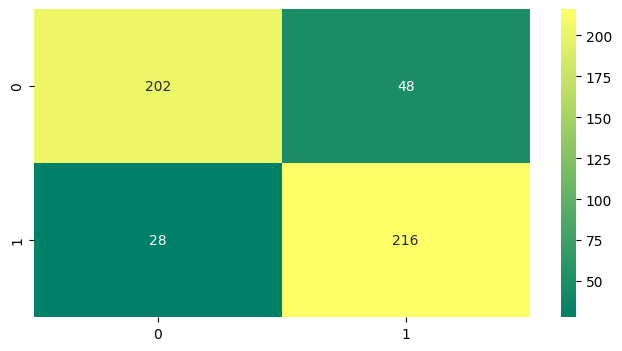

In [41]:
model_prediction(LogisticRegression())


------------------------------------------------------------------------
Accuracy_Score of KNeighborsClassifier() model on Training Data is: 89.95943204868155
Accuracy_Score of KNeighborsClassifier() model on Testing Data is: 84.81781376518218
ROC_AUC Score of KNeighborsClassifier() model is: 0.9589672131147541
f1 Score of KNeighborsClassifier() model is: 0.8648648648648647

------------------------------------------------------------------------
Classification Report of KNeighborsClassifier() model is:
              precision    recall  f1-score   support

           0       0.98      0.72      0.83       250
           1       0.77      0.98      0.86       244

    accuracy                           0.85       494
   macro avg       0.87      0.85      0.85       494
weighted avg       0.88      0.85      0.85       494


------------------------------------------------------------------------
Confusion Matrix of KNeighborsClassifier() model is:


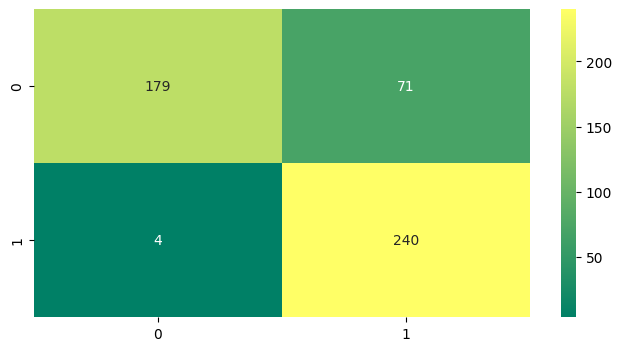

In [42]:
model_prediction(KNeighborsClassifier())


------------------------------------------------------------------------
Accuracy_Score of SVC() model on Training Data is: 97.00811359026369
Accuracy_Score of SVC() model on Testing Data is: 93.52226720647774
f1 Score of SVC() model is: 0.934156378600823

------------------------------------------------------------------------
Classification Report of SVC() model is:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       250
           1       0.94      0.93      0.93       244

    accuracy                           0.94       494
   macro avg       0.94      0.94      0.94       494
weighted avg       0.94      0.94      0.94       494


------------------------------------------------------------------------
Confusion Matrix of SVC() model is:


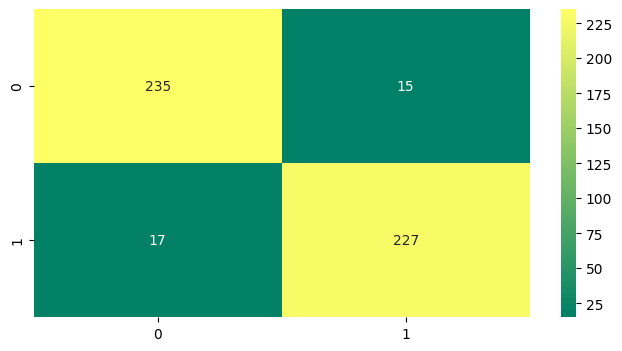

In [43]:
model= SVC()
model.predict
model.fit(x_train1,y_train1)
x_train_pred1 = model.predict(x_train1_scale)
x_test_pred1 = model.predict(x_test1_scale)

a = accuracy_score(y_train1,x_train_pred1)*100
b = accuracy_score(y_test1,x_test_pred1)*100
c = f1_score(y_test1,x_test_pred1)

 # for storing results
training_score.append(a)
testing_score.append(b)
Roc_Auc_score.append(0)
f1_score_.append(c)

print("\n------------------------------------------------------------------------")
print(f"Accuracy_Score of {model} model on Training Data is:",a)
print(f"Accuracy_Score of {model} model on Testing Data is:",b)
print(f"f1 Score of {model} model is:", c)

print("\n------------------------------------------------------------------------")
print(f"Classification Report of {model} model is:")
print(classification_report(y_test1,x_test_pred1))

print("\n------------------------------------------------------------------------")
print(f"Confusion Matrix of {model} model is:")
cm = confusion_matrix(y_test1,x_test_pred1)
plt.figure(figsize=(8,4))
sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
plt.show()

 # Building Model on Unscaled data

In [44]:
def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred1 = model.predict(x_train)
    x_test_pred1 = model.predict(x_test)
    y_test_prob1 = model.predict_proba(x_test)[:, 1]
    a = accuracy_score(y_train,x_train_pred1)*100
    b = accuracy_score(y_test,x_test_pred1)*100
    c = roc_auc_score(y_test, y_test_prob1)
    d = f1_score(y_test,x_test_pred1)

    # for storing results
    training_score.append(a)
    testing_score.append(b)
    Roc_Auc_score.append(c)
    f1_score_.append(d)


    print("\n------------------------------------------------------------------------")
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print(f"ROC_AUC Score of {model} model is:", c)
    print(f"f1 Score of {model} model is:", d)

    print("\n------------------------------------------------------------------------")
    print(f"Classification Report of {model} model is:")
    print(classification_report(y_test1,x_test_pred1))

    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test1,x_test_pred1)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()


------------------------------------------------------------------------
Accuracy_Score of RandomForestClassifier() model on Training Data is: 100.0
Accuracy_Score of RandomForestClassifier() model on Testing Data is: 93.31983805668015
ROC_AUC Score of RandomForestClassifier() model is: 0.9694180327868853
f1 Score of RandomForestClassifier() model is: 0.9287257019438445

------------------------------------------------------------------------
Classification Report of RandomForestClassifier() model is:
              precision    recall  f1-score   support

           0       0.89      0.98      0.94       250
           1       0.98      0.88      0.93       244

    accuracy                           0.93       494
   macro avg       0.94      0.93      0.93       494
weighted avg       0.94      0.93      0.93       494


------------------------------------------------------------------------
Confusion Matrix of RandomForestClassifier() model is:


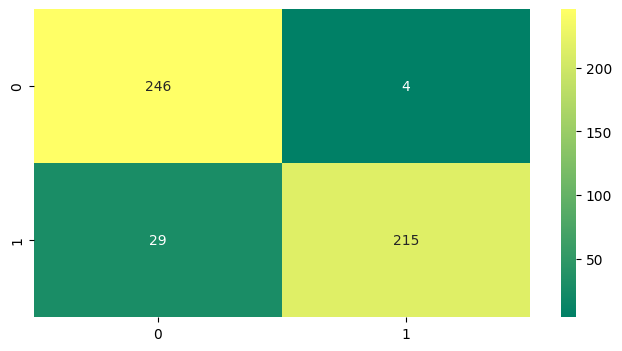

In [45]:
rf=RandomForestClassifier()
model_prediction(rf)



------------------------------------------------------------------------
Accuracy_Score of GradientBoostingClassifier() model on Training Data is: 96.19675456389453
Accuracy_Score of GradientBoostingClassifier() model on Testing Data is: 93.11740890688259
ROC_AUC Score of GradientBoostingClassifier() model is: 0.9637213114754098
f1 Score of GradientBoostingClassifier() model is: 0.9273504273504274

------------------------------------------------------------------------
Classification Report of GradientBoostingClassifier() model is:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       250
           1       0.97      0.89      0.93       244

    accuracy                           0.93       494
   macro avg       0.93      0.93      0.93       494
weighted avg       0.93      0.93      0.93       494


------------------------------------------------------------------------
Confusion Matrix of GradientBoostingClassifier() model is:


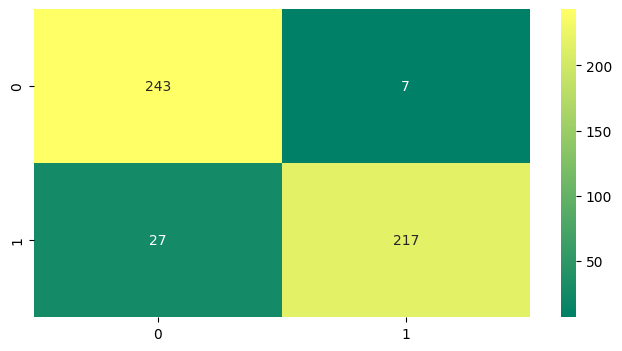

In [46]:
model_prediction(GradientBoostingClassifier())


------------------------------------------------------------------------
Accuracy_Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) model on Training Data is: 100.0
Accuracy_Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, 

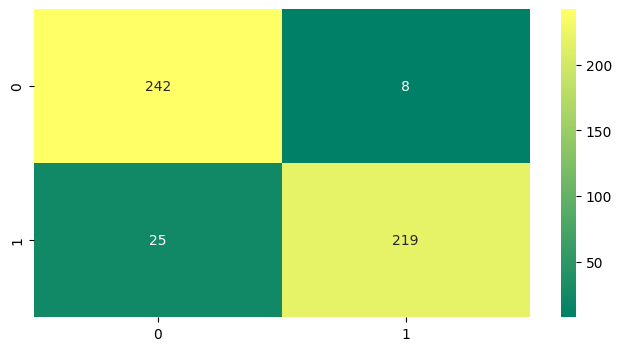

In [47]:
model_prediction(XGBClassifier())

In [48]:
models=[LogisticRegression(),KNeighborsClassifier(),SVC(),RandomForestClassifier(),GradientBoostingClassifier(),XGBClassifier()]
results=pd.DataFrame({'Algorithm':models,'Training_accuracy':training_score,'Testing_accuracy':testing_score,'Roc_Auc_score':Roc_Auc_score,'f1_score':f1_score_})




In [49]:
results

,Algorithm,Training_accuracy,Testing_accuracy,Roc_Auc_score,f1_score
0,LogisticRegression(),86.561866,84.615385,0.935820,0.850394
1,KNeighborsClassifier(),89.959432,84.817814,0.958967,0.864865
2,SVC(),97.008114,93.522267,0.000000,0.934156
3,RandomForestClassifier(),100.000000,93.319838,0.969418,0.928726
4,GradientBoostingClassifier(),96.196755,93.117409,0.963721,0.927350
5,"XGBClassifier(base_score=None, booster=None, c...",100.000000,93.319838,0.975197,0.929936


* Results table shows that RandomForest and XGB Classifier have highest
Roc_Auc_score
* From respective confusion matrix, Random forest has lower False positive compared to XGB Classifier(Predicting some one will leave, when they are not)

# Moving forward with Random forest classifier for Hyper parameter Tuning

In [ ]:
# hyper parameters

# n_estimators: Number of trees in the forest.
# max_depth: Maximum depth of each tree.
# max_features: Number of features considered for splitting at each node.
""" min_samples_split: Minimum samples required to split a node.Higher values can prevent overfitting,
but too high can hinder model complexity.min_samples_leaf: Minimum samples required to be at a leaf node."""

params ={'n_estimators': [100, 200, 300],
        'max_depth': [3,5,10],              # we have small dataset so will it small
         'min_samples_split': [2, 5, 10],
         'min_samples_leaf': [1, 2, 4]}

In [ ]:
rfc=RandomForestClassifier()
rf_gs=GridSearchCV(rfc,params)
rf_gs.fit(x_train,y_train)
print("Best Parameters:", rf_gs.best_params_)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}


# Final Model

* Training and evaluating our final model using K-Fold cross validation

In [74]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score # Import the necessary metrics
kfold=StratifiedKFold(n_splits=10,shuffle=True,random_state=42)

#storing results
accuracy_scores = []
f1_scores = []
precision_scores = []
aucroc=[]

#initialising the model with besthyper parametrs
rfc_tunes=RandomForestClassifier(max_depth= 10,min_samples_leaf= 2, min_samples_split= 5, n_estimators=300)

for train_data, test_data in kfold.split(X_smote, y_smote):
  x_train_cv, x_test_cv = X_smote.iloc[train_data], X_smote.iloc[test_data]
  y_train_cv, y_test_cv = y_smote.iloc[train_data], y_smote.iloc[test_data]

  #fit data for each cv
  rfc_tunes.fit(x_train_cv,y_train_cv)
  y_pred_cv=rfc_tunes.predict(x_test_cv)

  # Calculate metrics for this fold
  accuracy_scores.append(accuracy_score(y_test_cv, y_pred_cv))
  f1_scores.append(f1_score(y_test_cv, y_pred_cv))
  precision_scores.append(precision_score(y_test_cv, y_pred_cv))
  aucroc.append(roc_auc_score(y_test_cv, y_pred_cv))


# Average metrics across all folds
avg_accuracy = np.mean(accuracy_scores)
avg_f1 = np.mean(f1_scores)
avg_precision = np.mean(precision_scores)
avg_aucroc=np.mean(aucroc)

print(f"accuracy score:{avg_accuracy}")
print(f"f1 score:{avg_f1}")
print(f"precision score:{avg_precision}")
print(f"aucroc score:{avg_aucroc}")

accuracy score:0.9237632072677002
f1 score:0.9198722958204147
precision score:0.9680509862324984
aucroc score:0.9237772095462891


### saving our generalised model

In [75]:
import pickle as pk
pk.dump(rfc_tunes,open('model.pkl','wb'))

from google.colab import files

files.download('model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>